###  - Where are tickets most commonly issued?

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
import math
from matplotlib import pyplot
import seaborn as sns

In [2]:
data_13_14 = pd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv",
                        usecols=['Violation County'])

/home/abishek/miniconda3/envs/anishka/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data_13_14.shape

(9100278, 1)

In [4]:
data_13_14.head()

,Violation County
0,NaN
1,NY
2,NY
3,NY
4,NY


In [10]:
type(data_13_14['Violation County'][0])

float

In [5]:
math.isnan(data_13_14['Violation County'][0])

True

In [11]:
counties = defaultdict(int)

for county in data_13_14['Violation County']:
    if isinstance(county,float):
        if math.isnan(county):
            counties['NaN'] += 1
        else:
            counties[county] += 1
    else:
        counties[county] +=1

In [12]:
counties

defaultdict(int,
            {'NaN': 705205,
             'NY': 3547196,
             'K': 1979048,
             'R': 99290,
             'Q': 1825974,
             'BX': 943549,
             'RICH': 4,
             'BRONX': 3,
             'KINGS': 1,
             'NYC': 2,
             '103': 1,
             'QUEEN': 3,
             'RC': 2})

In [14]:
counties_df = pd.DataFrame(counties.items(),columns=['County','Violations'])

In [15]:
counties_df

,County,Violations
0,NaN,705205
1,NY,3547196
2,K,1979048
3,R,99290
4,Q,1825974
5,BX,943549
6,RICH,4
7,BRONX,3
8,KINGS,1
9,NYC,2


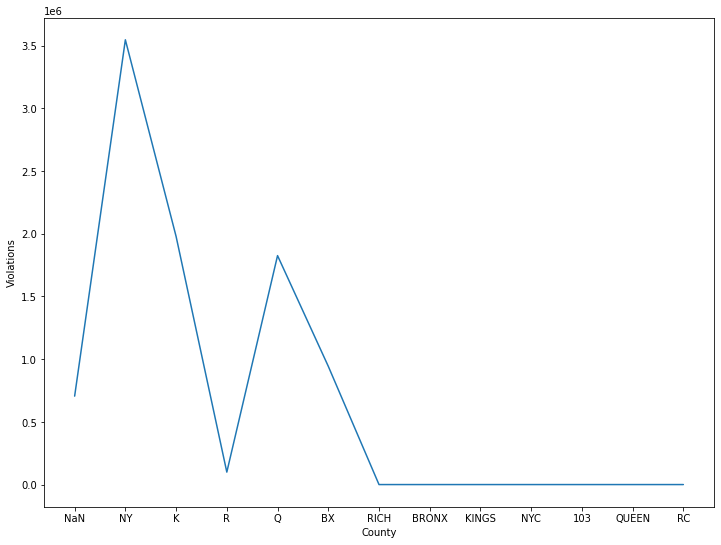

In [18]:
_, ax = pyplot.subplots(figsize=(12,9))
sns.set(style="darkgrid")

# Plot the isse dates for different months
sns.lineplot(x="County",y="Violations",ax=ax,data=counties_df,sort=False)

In [3]:
class ViolationCounty:
    def __init__(self,path):
        data = pd.read_csv(path,usecols=['Violation County'])
        
        print("data.shape",data.shape)
        
        counties = defaultdict(int)
        
        for county in data['Violation County']:
            if isinstance(county,float):
                if math.isnan(county):
                    counties['NaN'] += 1
                else:
                    counties[county] += 1
            else:
                counties[county] +=1
        
        self.counties_df = pd.DataFrame(counties.items(),columns=['County','Violations'])
        
    def plot(self):
        _, ax = pyplot.subplots(figsize=(12,9))
        sns.set(style="darkgrid")
        
        # Plot the isse dates for different months
        sns.lineplot(x="County",y="Violations",ax=ax,data=self.counties_df,sort=False)

/home/abishek/miniconda3/envs/anishka/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


data.shape (9100278, 1)


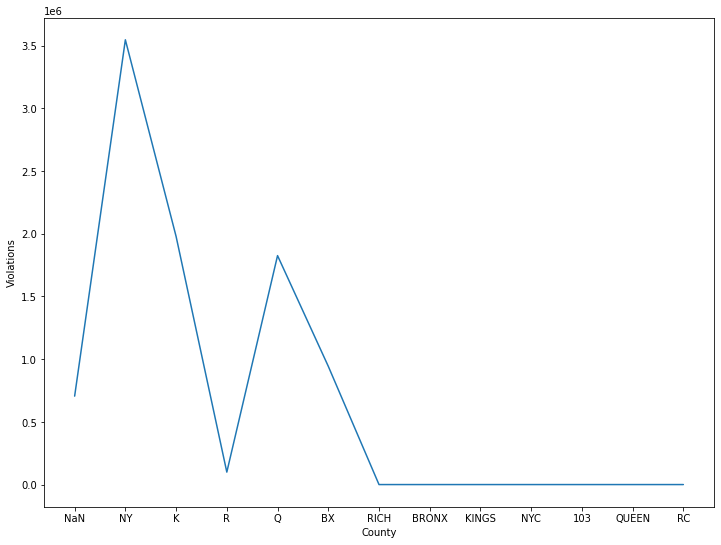

In [4]:
obj_13_14 = ViolationCounty("./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv")
obj_13_14.plot()

data.shape (11809233, 1)


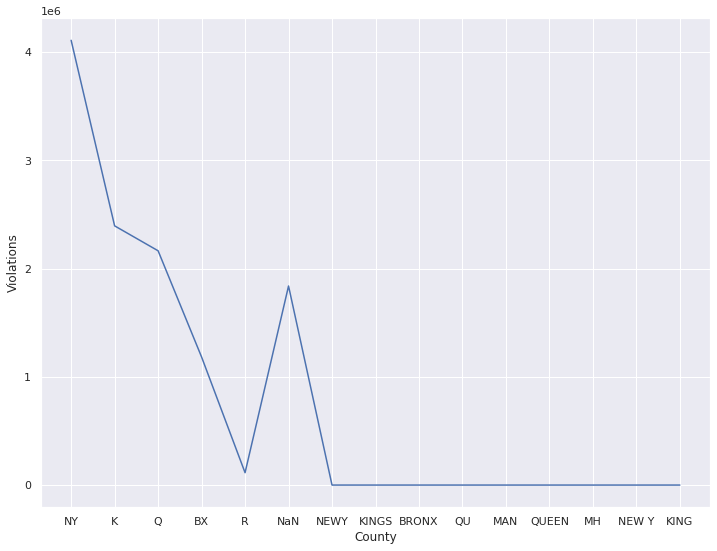

In [5]:
obj_15 = ViolationCounty("./Parking_Violations_Issued_-_Fiscal_Year_2015.csv")
obj_15.plot()

/home/abishek/miniconda3/envs/anishka/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


data.shape (10626899, 1)


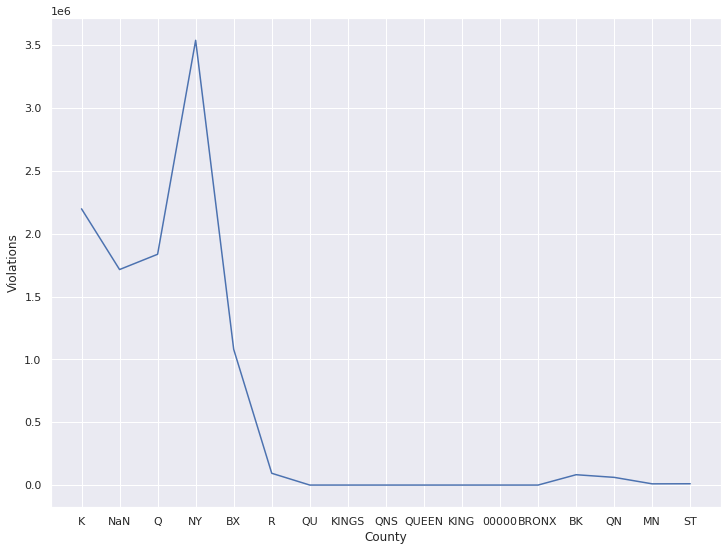

In [6]:
obj_16 = ViolationCounty("./Parking_Violations_Issued_-_Fiscal_Year_2016.csv")
obj_16.plot()

data.shape (10803028, 1)


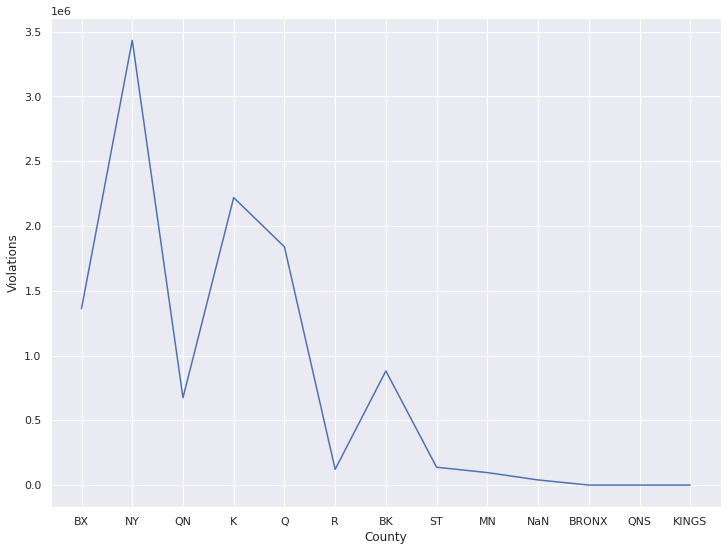

In [7]:
obj_17 = ViolationCounty("./Parking_Violations_Issued_-_Fiscal_Year_2017.csv")
obj_17.plot()